# Python Assignment 5
ECE 7995_1801_003: Detection and Estimation 
Submitted By: Prabhjot Kaur

LFW dataset 

In [12]:
import numpy as np
from scipy import linalg
from sklearn import datasets
import matplotlib.pyplot as plt

In [13]:
#### Q1 Using the 'fetch_lfw_people' module, load the LFW dataset. Use the 'min_faces_per_person=100' option in the loader
#       to ensure that each class has sufficiently many image samples.

faces = datasets.fetch_lfw_people(min_faces_per_person=100)

#target_names = faces.target_names
#print(target_names)

In [14]:
#### Q2 Divide the dataset into two sets, training and test, with an 80/20 split. 
#       Make sure that the classes are equally represented in the training and test sets.

train_faces_img = []
train_faces_labels = []
test_faces_img = []
test_faces_labels = []
for i in range(0,5749):
    index = faces.target==i
    img = faces.images[index]
    label = faces.target[index]
    for j in range(0,int(np.ceil(len(label)*0.8))):
        train_faces_img.append(img[j])
        train_faces_labels.append(label[j])
    for k in range(int(np.ceil(len(label)*0.8)), len(label)):
        test_faces_img.append(img[k])
        test_faces_labels.append(label[k])   

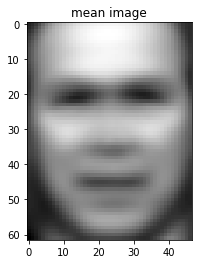

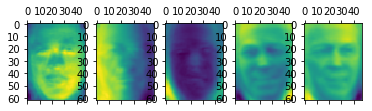

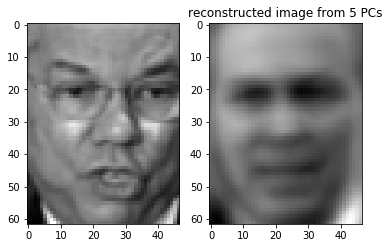

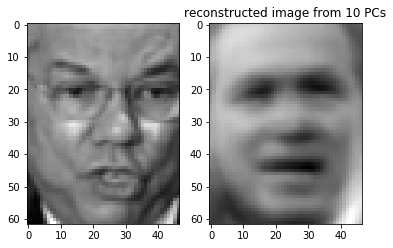

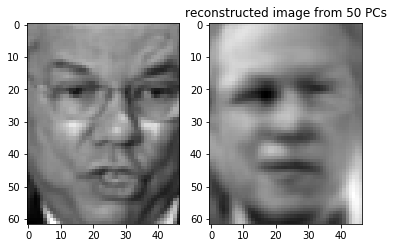

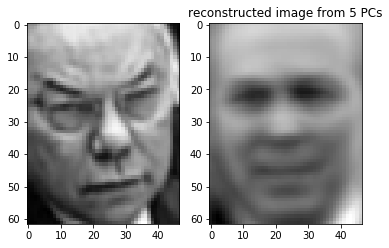

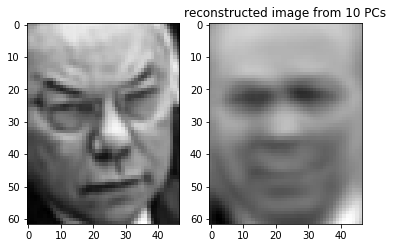

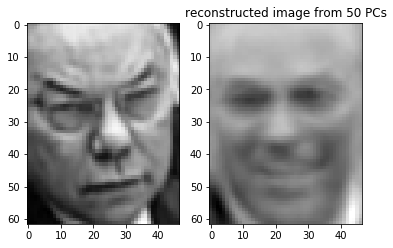

In [29]:
#### Q3 Perform PCA using the training set. Display both the mean image and the first five principal components. 
#       Also, show the result of reconstructing several images from the test set using k=5,10,50 components.


# Mean of images in the training dataset
mu = np.reshape(np.mean(train_faces_img,0),(2914,1))

#covarinace of faces training class
x = np.resize(train_faces_img,(len(train_faces_img),(2914))) # images stored as row vectors
v = x.T-mu
K_0 = (v@v.T)/len(train_faces_img)

# eigenvectors of the covaraince matrix
eVal_0,eVec_0 = np.linalg.eig(K_0)

#Extract first k principal components
k = np.array([5,10,50])
U_0 = eVec_0[:,0:k[0]]
U_1 = eVec_0[:,0:k[1]]
U_2 = eVec_0[:,0:k[2]]

#display the mean image
plt.imshow(mu.reshape((62, 47)), cmap=plt.cm.gray)
plt.title('mean image', size=12)

#display the first five principal components
fig, axes = plt.subplots(1,5)
for i in range(0,5):
    axes[i].matshow(U_0[:,i].reshape((62,47)))

# Reconstructing test images from principal components
image_index = 100
x = test_faces_img[image_index].reshape((2914,1)) - mu
x_reconstructed = np.reshape(U_0@U_0.T@x,[62,47]) + mu.reshape((62,47))
fig, axs =plt.subplots(ncols=2)
plt.title('reconstructed image from 5 PCs')
axs[0].imshow(train_faces_img[image_index],cmap=plt.cm.gray,interpolation="nearest")
axs[1].imshow(x_reconstructed,cmap=plt.cm.gray,interpolation="nearest")
plt.show()

x_reconstructed = np.reshape(U_1@U_1.T@x,[62,47]) + mu.reshape((62,47))
fig, axs =plt.subplots(ncols=2)
plt.title('reconstructed image from 10 PCs')
axs[0].imshow(train_faces_img[image_index],cmap=plt.cm.gray,interpolation="nearest")
axs[1].imshow(x_reconstructed,cmap=plt.cm.gray,interpolation="nearest")
plt.show()

x_reconstructed = np.reshape(U_2@U_2.T@x,[62,47]) + mu.reshape((62,47))
fig, axs =plt.subplots(ncols=2)
plt.title('reconstructed image from 50 PCs')
axs[0].imshow(train_faces_img[image_index],cmap=plt.cm.gray,interpolation="nearest")
axs[1].imshow(x_reconstructed,cmap=plt.cm.gray,interpolation="nearest")
plt.show()


image_index = 20
x = test_faces_img[image_index].reshape((2914,1)) - mu
x_reconstructed = np.reshape(U_0@U_0.T@x,[62,47]) + mu.reshape((62,47))
fig, axs =plt.subplots(ncols=2)
plt.title('reconstructed image from 5 PCs')
axs[0].imshow(train_faces_img[image_index],cmap=plt.cm.gray,interpolation="nearest")
axs[1].imshow(x_reconstructed,cmap=plt.cm.gray,interpolation="nearest")
plt.show()

x_reconstructed = np.reshape(U_1@U_1.T@x,[62,47]) + mu.reshape((62,47))
fig, axs =plt.subplots(ncols=2)
plt.title('reconstructed image from 10 PCs')
axs[0].imshow(train_faces_img[image_index],cmap=plt.cm.gray,interpolation="nearest")
axs[1].imshow(x_reconstructed,cmap=plt.cm.gray,interpolation="nearest")
plt.show()

x_reconstructed = np.reshape(U_2@U_2.T@x,[62,47]) + mu.reshape((62,47))
fig, axs =plt.subplots(ncols=2)
plt.title('reconstructed image from 50 PCs')
axs[0].imshow(train_faces_img[image_index],cmap=plt.cm.gray,interpolation="nearest")
axs[1].imshow(x_reconstructed,cmap=plt.cm.gray,interpolation="nearest")
plt.show()

Text(0,0.5,'mean error')

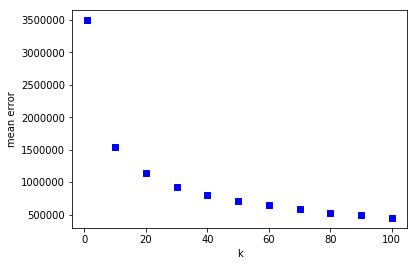

In [28]:
#### Q4 Compute the mean square reconstruction error over the test set. 
#       That is, for each image in the test set, compute the squared norm of the test image minus its PCA reconstruction, 
#       then compute the average of these errors. Plot the mean reconstruction error for k=1,10,20,30,...,100.

k = np.array([1,10,20,30,40,50,60,70,80,90,100])
mean_err = np.zeros((k.size))
for j in range(0,k.size):
    U = eVec_0[:,0:k[j]]
    total_error = 0
    for i in range(0,len(test_faces_img)):
        y = test_faces_img[i].reshape((2914,1)) - mu
        y_reconstructed = U@U.T@y 
        error = np.square(np.linalg.norm(y-y_reconstructed))
        total_error = total_error + error
    mean_err[j]= total_error/len(test_faces_img)

plt.plot(k,mean_err,'bs')
plt.xlabel('k')
plt.ylabel('mean error')

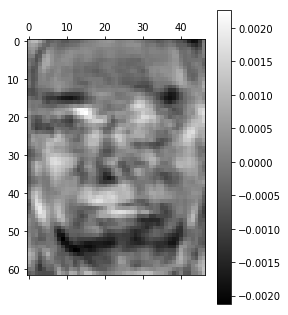

The probability of error averaged over the training set is:  1.0000000000000062
The probability of error averaged over the test set is:  0.9154929577464781


In [51]:
#### Q5 Reduce the training and test sets to include only the images from the first two classes. 
#       Then, train a logistic regression model as described in class using the training set. 
#       Compute the classification error probability, first averaged over the training set, and then over the test set. 

# Reduce test and training sets to include images from classes 0 and 1 only
train_faces_img = []
train_faces_labels = []
test_faces_img = []
test_faces_labels = []
for i in range(0,2):
    index = faces.target==i
    img = faces.images[index]
    label = faces.target[index]
    for j in range(0,int(np.ceil(len(label)*0.8))):
        train_faces_img.append(img[j])
        train_faces_labels.append(label[j])
    for k in range(int(np.ceil(len(label)*0.8)), len(label)):
        test_faces_img.append(img[k])
        test_faces_labels.append(label[k])   
        
# Train a logistic regression model using the training set
b = np.zeros([2914+1,1])
NUM_ITERATIONS = 100000

#take the gradient descent steps
for t in range(0,NUM_ITERATIONS):
    #evaluate the cost function at the current iteration
    #L = 0
    #for i in range(0,len(train_faces_img)):
    #    x = np.array([train_faces_img[i].flatten()]).T
    #    x = np.vstack((x,[1]))
        
    #    L -= (1/len(train_faces_img))*((1-train_faces_labels[i])*b.T@x - np.log(1+np.exp(b.T@x)))
    #print("CURRENT COST: " + str(L))
    
    #alpha = np.sqrt(1/(t+1)) #stepsize
    alpha = 0.0000001
    g = np.zeros([2914+1,1])
    for i in range(0,len(train_faces_img)):
        x = np.array([train_faces_img[i].flatten()]).T
        x = np.vstack((x,[1]))
        
        g -= (1/len(train_faces_img))*x*((1-train_faces_labels[i]) - np.exp(b.T@x)/(1+np.exp(b.T@x))) # minus?
    b -= alpha*g
    
b_image = np.reshape(b[:2914],(62,47))
plt.matshow(b_image,cmap=plt.cm.gray) 
plt.colorbar()
plt.show()

#Classification error probability, first averaged over the training set and the over the test set
# training set
p_err = 0
for i in range(0,len(train_faces_img)):
    x = train_faces_img[i].reshape((2914,1))
    if b[:2914].T@x > 0:
        predicted_class = 1
    else:
        predicted_class = 0
    if predicted_class != train_faces_labels[i]:
        p_err = p_err + 1/len(train_faces_img)
print('The probability of error averaged over the training set is: ',p_err)       

# test set
p_err = 0
for i in range(0,len(test_faces_img)):
    x = test_faces_img[i].reshape((2914,1))
    if b[:2914].T@x > 0:
        predicted_class = 1
    else:
        predicted_class = 0
    if predicted_class != test_faces_labels[i]:
        p_err = p_err + 1/len(test_faces_img)
print('The probability of error averaged over the test set is: ',p_err)    




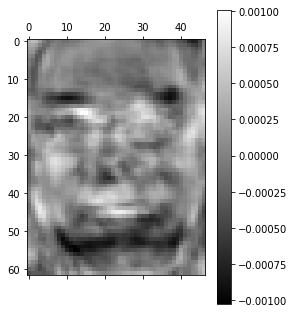

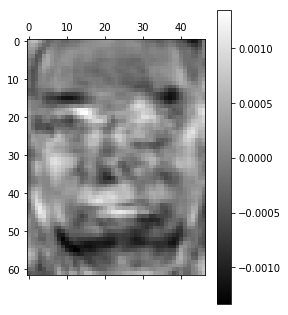

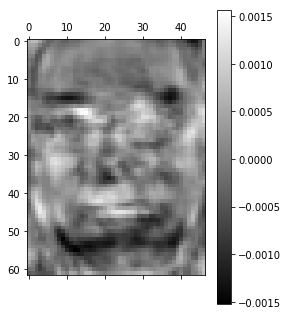

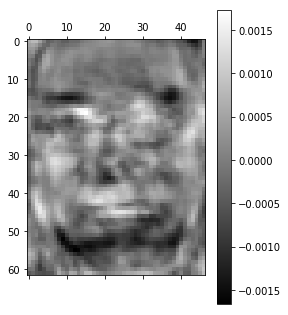

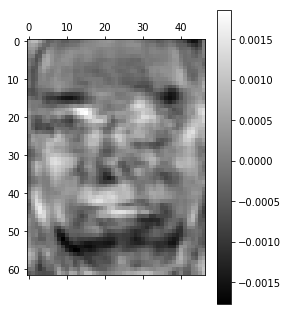

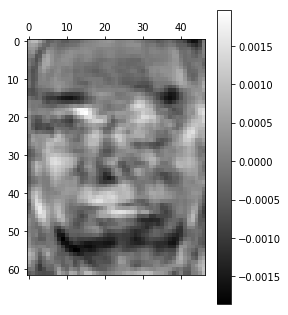

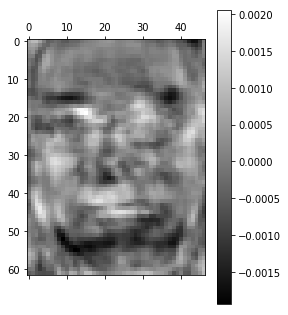

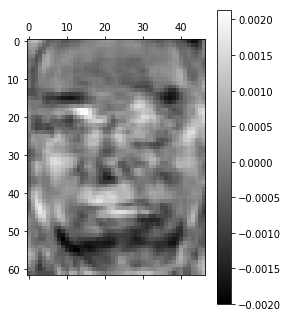

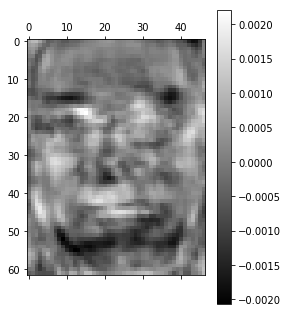

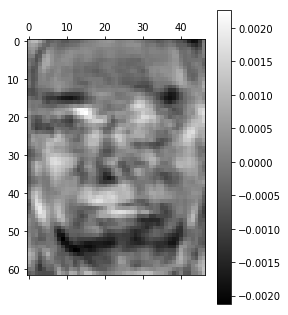

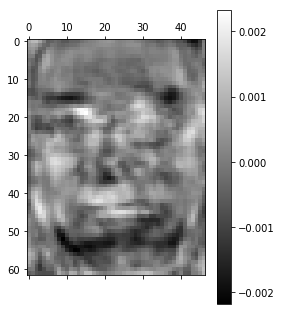

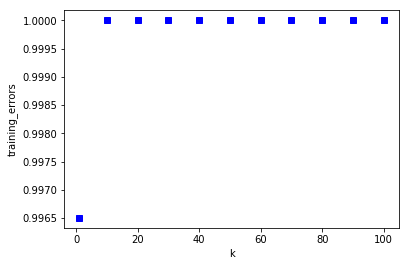

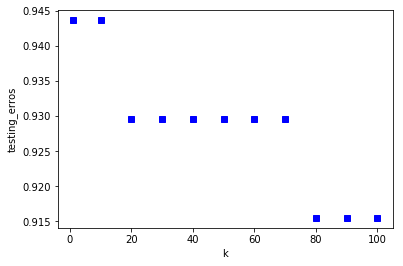

In [58]:
#### Q6 Finally, train a logistic regression model using only the first k principal components learned in part (3). 
#       [That is, use the principal components learned over the entire training set.] 
#       Plot the training and testing errors of the logistic regression model for k=1,10,20,30,...,100. 
#       What can you say about the effect of PCA on the generalization error? On overall performance?

# Train a logistic regression model using the first k principal components
b = np.zeros([2914+1,1])
NUM_ITERATIONS = 10000

k = np.array([1,10,20,30,40,50,60,70,80,90,100])
testing_errors = np.zeros((k.size))
training_errors = np.zeros((k.size))
for j in range(0,k.size):
    U = eVec_0[:,0:k[j]]
    
    #take the gradient descent steps
    for t in range(0,NUM_ITERATIONS):
        #evaluate the cost function at the current iteration
        #L = 0
        #for i in range(0,len(train_faces_img)):
        #    x = np.array([train_faces_img[i].flatten()]).T
        #    x = np.vstack((x,[1]))
        
        #    L -= (1/len(train_faces_img))*((1-train_faces_labels[i])*b.T@x - np.log(1+np.exp(b.T@x)))
        #print("CURRENT COST: " + str(L))
    
        #alpha = np.sqrt(1/(t+1)) #stepsize
        alpha = 0.0000001
        g = np.zeros([2914+1,1])
        for i in range(0,len(train_faces_img)):
            x = np.array([train_faces_img[i].flatten()]).T
            x = np.vstack((x,[1]))
        
            g -= (1/len(train_faces_img))*x*((1-train_faces_labels[i]) - np.exp(b.T@x)/(1+np.exp(b.T@x))) # minus?
        b -= alpha*g
    
    b_image = np.reshape(b[:2914],(62,47))
    plt.matshow(b_image,cmap=plt.cm.gray) 
    plt.colorbar()
    plt.show()

    #Classification error probability, first averaged over the training set and the over the test set
    # training set
    p_err = 0
    for i in range(0,len(train_faces_img)):
        x = train_faces_img[i].reshape((2914,1))
        if b[:2914].T@x > 0:
            predicted_class = 1
        else:
            predicted_class = 0
        if predicted_class != train_faces_labels[i]:
            p_err = p_err + 1/len(train_faces_img)
    training_errors[j] = p_err   

    # test set
    p_err = 0
    for i in range(0,len(test_faces_img)):
        x = test_faces_img[i].reshape((2914,1))
        if b[:2914].T@x > 0:
            predicted_class = 1
        else:
            predicted_class = 0
        if predicted_class != test_faces_labels[i]:
            p_err = p_err + 1/len(test_faces_img)
    testing_errors[j] = p_err

plt.plot(k,training_errors,'bs')
plt.xlabel('k')
plt.ylabel('training_errors')
plt.show()

plt.plot(k,testing_errors,'bs')
plt.xlabel('k')
plt.ylabel('testing_erros')
plt.show()

    



In [59]:
print(training_errors)
print(testing_errors)

[0.9965035 1.        1.        1.        1.        1.        1.
 1.        1.        1.        1.       ]
[0.94366197 0.94366197 0.92957746 0.92957746 0.92957746 0.92957746
 0.92957746 0.92957746 0.91549296 0.91549296 0.91549296]


The logistics regression model trained using PCAs performed the same as the one trained using training set.